In [44]:
pwd

'/content'

In [45]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
pip list | grep scikit-learn

scikit-learn                  0.21.3             


In [47]:
pip uninstall scikit-learn

Uninstalling scikit-learn-0.21.3:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/scikit_learn-0.21.3.dist-info/*
    /usr/local/lib/python3.7/dist-packages/sklearn/*
Proceed (y/n)? y
  Successfully uninstalled scikit-learn-0.21.3


In [48]:
pip install --upgrade scikit-learn==0.21.3


  Using cached https://files.pythonhosted.org/packages/9f/c5/e5267eb84994e9a92a2c6a6ee768514f255d036f3c8378acfa694e9f2c99/scikit_learn-0.21.3-cp37-cp37m-manylinux1_x86_64.whl


In [49]:
import pandas as pd
import pandas as pd
print("pandas version: ", pd.__version__)

pd.set_option('display.max_columns', None)


pandas version:  1.1.5


In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Data import
survey_2017 = pd.read_csv("../content/drive/MyDrive/final3.csv")
print(survey_2017.shape)
#print(survey_2017.columns)
survey_2016 = pd.read_csv("../content/drive/MyDrive/mental-heath-in-tech-2016_20161114.csv")
print(survey_2016.shape)
#print(survey_2016.columns)

# 2017 -> 2016 프리프로세싱 2100명 1433 -> 79~~~> 시작을할껀데 이게 어떠냐 올릴 더좋은 방법있는가? 

List = []
List2 = []
for temp in survey_2017.columns[:]:
    #print(temp)
    List.append(temp)
print(List)
print('!!!!!!!!!!!!!!!!!!!!!!!!!!!!')

for temp2 in survey_2016.columns[:]:
    List2.append(temp2)

print(List2)

for i in range (0,63):
    if List[i] == List2[i]:
        continue
    else:
        print(i+1)
        print('NO');
        print('2017:'+ List[i])
        print('2016:' + List2[i])

#for()


#질문에 대해서 긴단어들 정리 
#성별에 관해서 정수값으로 바꾸고 
#나이에대해서 평균으로 preprocessing
#10번까지 했음 

#2017 11 -> x
#2017 12 -> x
#13번 2016질문은 2017 15문항에 있다. 2017 O -> M (O)
#14번 다른질문 2016 14질문은 2017 12문항에 있다. 2017 L -> N (O) 
# 25 번 2016번 질문은 2017 30문항에 있다. (O)
# 24 번 2016번 질문은 2017 29문항에 있다. (O)
# 23 번 2016번 질문은 2017 28문항에 있다. (O)
#2017 27 -> x
#2017 26 -> x
#2017 25 -> x
#2017 24 -> x
#2017 23 -> x
#2017 22 -> x
#2017 21 -> x
#2017 20 -> x
#2017 19 -> x
#2017 18 -> x
#2017 17 -> x
#2017 16 -> x


# 11 - 유사한 질문이나 
# 16 -> pass
# 20 -> 답이 다르다
# 22 -> 답이 다르다.
# 30 -> 없다.
# 31,32,41,48,49,50,52,53,62,63 -> 이제 2016년도있는데 2017년도에 없어서 평균을 내서 2017년도에 넣어야한다. 2016년도께 들어가 있다. (해결 min) 

#42 -> 다시봐야한다.
#55 -> 다시봐야한다.

#5//25일 

#내일 진행관련 1.질문 같게 정리 2.2016년도 에 있는데 2017년도에 없는 질문은 평균을내서 2017년 같은열에 넣어야한다.  95% 
#비슷질문인데 답이 다른것에대해 정리하기 5% 3일차 
#위 모든걸 원재랑 상의 해야한다. 

#5/25 
#데이터를 찍어네는데는 성공했지만  int형과 str사이 간극이 벌어진거 같음



(756, 122)
(1433, 63)
['Are you self-employed?', 'How many employees does your company or organization have?', 'Is your employer primarily a tech company/organization?', 'Is your primary role within your company related to tech/IT?', 'Does your employer provide mental health benefits as part of coverage?', 'Do you know the options for mental health care available under your employer-provided health coverage?', 'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?', 'Does your employer offer resources to learn more about mental health concern and options for seeking help?', 'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?', 'Do you think that discussing a mental health disorder with your employer would have negative consequences?', 'If a mental health issue prompted you to request a medical leave from work, askin

In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Data import
#survey_2015 = pd.read_csv("../content/drive/MyDrive/mental-heath-in-tech-2016_20161114.csv")
survey_2016 = pd.read_csv("../content/drive/MyDrive/final_test1.csv")
#print(survey_2016.columns)
#print(survey_2016.shape)
#print(survey_2015.shape)
#print(survey_2016.iloc[1320:1425])

# ----------- CLEANING THE DATA -----------
# Column rename
renamed_columns = ['self_empl_flag', 'comp_no_empl', 'tech_comp_flag', 'tech_role_flag', 'mh_coverage_flag',
                  'mh_coverage_awareness_flag', 'mh_employer_discussion', 'mh_resources_provided', 'mh_anonimity_flag',
                  'mh_medical_leave', 'mh_discussion_neg_impact', 'ph_discussion_neg_impact', 'mh_discussion_cowork',
                  'mh_discussion_supervis', 'mh_eq_ph_employer', 'mh_conseq_coworkers', 'mh_coverage_flag2', 'mh_online_res_flag',
                  'mh_diagnosed&reveal_clients_flag', 'mh_diagnosed&reveal_clients_impact', 'mh_diagnosed&reveal_cowork_flag', 'mh_cowork_reveal_neg_impact',
                  'mh_prod_impact', 'mh_prod_impact_perc', 'prev_employers_flag', 'prev_mh_benefits', 'prev_mh_benefits_awareness',
                  'prev_mh_discussion', 'prev_mh_resources', 'prev_mh_anonimity', 'prev_mh_discuss_neg_conseq', 'prev_ph_discuss_neg_conseq',
                  'prev_mh_discussion_cowork', 'prev_mh_discussion_supervisor', 'prev_mh_importance_employer', 'prev_mh_conseq_coworkers',
                  'future_ph_specification', 'why/why_not', 'future_mh_specification', 'why/why_not2', 'mh_hurt_on_career', 'mh_neg_view_cowork',
                  'mh_sharing_friends/fam_flag', 'mh_bad_response_workplace', 'mh_for_others_bad_response_workplace', 'mh_family_hist',
                  'mh_disorder_past', 'mh_disorder_current',  'mh_diagnos_proffesional',
                   'mh_sought_proffes_treatm', 'mh_eff_treat_impact_on_work', 'mh_not_eff_treat_impact_on_work',
                  'age', 'sex', 'country_live', 'live_us_teritory', 'country_work', 'work_us_teritory']
survey_2016.columns = renamed_columns
print(survey_2016.shape)
#survey_2015.columns = renamed_columns
#print('질문 정리가 이렇게 바뀌었다')
#print(survey_2016.columns)
#print('!!!!!!!!!!')
#print(survey_2016['sex'])
# Sex column needs to be recoded (number of unique values = 70)
survey_2016['sex'].replace(to_replace = ['Male', 'male', 'Male ', 'M', 'm',
       'man', 'Cis male', 'Male.', 'male 9:1 female, roughly', 'Male (cis)', 'Man', 'Sex is male',
       'cis male', 'Malr', 'Dude', "I'm a man why didn't you make this a drop down question. You should of asked sex? And I would of answered yes please. Seriously how much text can this take? ",
       'mail', 'M|', 'Male/genderqueer', 'male ',
       'Cis Male', 'Male (trans, FtM)',
       'cisdude', 'cis man', 'MALE'], value = 1, inplace = True)

survey_2016['sex'].replace(to_replace = ['Female', 'female', 'I identify as female.', 'female ',
       'Female assigned at birth ', 'F', 'Woman', 'fm', 'f', 'Cis female ', 'Transitioned, M2F',
       'Genderfluid (born female)', 'Female or Multi-Gender Femme', 'Female ', 'woman', 'female/woman',
       'Cisgender Female', 'fem', 'Female (props for making this a freeform field, though)',
       ' Female', 'Cis-woman', 'female-bodied; no feelings about gender',
       'AFAB'], value = 2, inplace = True)

survey_2016['sex'].replace(to_replace = ['Bigender', 'non-binary', 'Other/Transfeminine',
       'Androgynous', 'Other', 'nb masculine',
       'none of your business', 'genderqueer', 'Human', 'Genderfluid',
       'Enby', 'genderqueer woman', 'mtf', 'Queer', 'Agender', 'Fluid',
       'Nonbinary', 'human', 'Unicorn', 'Genderqueer',
       'Genderflux demi-girl', 'Transgender woman'], value = 3, inplace = True)
#print('성별 정리가 이렇게 바뀌었다.')
#print(survey_2016['sex'])
# Recode Comp size & country columns (for ease when doing plots)
survey_2016['comp_no_empl'].replace(to_replace = ['More than 1000'], value = '>1000', inplace = True)
survey_2016['country_live'].replace(to_replace = ['United States of America'], value = 'USA', inplace = True)
survey_2016['country_live'].replace(to_replace = ['United Kingdom'], value = 'UK', inplace = True)
survey_2016['country_work'].replace(to_replace = ['United States of America'], value = 'USA', inplace = True)
survey_2016['country_work'].replace(to_replace = ['United Kingdom'], value = 'UK', inplace = True)

# Max age is 323, min age is 3.
# There are only 5 people that have weird ages (3yo, 15yo, or 99yo or 323 yo.) 
# These people will take the average age of the dataset (the correct calculated one, w/out outliers)
mean_age = survey_2016[(survey_2016['age'] >= 18) | (survey_2016['age'] <= 75)]['age'].mean()
survey_2016['age'].replace(to_replace = survey_2016[(survey_2016['age'] < 18) | (survey_2016['age'] > 75)]['age'].tolist(),
                          value = mean_age, inplace = True)
print('바뀐후')
print(survey_2016)
#print(survey_2016.iloc[1320:1425])

#질문에 대해서 긴단어들 정리 
#성별에 관해서 정수값으로 바꾸고 
#나이에대해서 평균으로 preprocessing


(2189, 58)
바뀐후


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



<module 'seaborn' from '/usr/local/lib/python3.7/dist-packages/seaborn/__init__.py'>


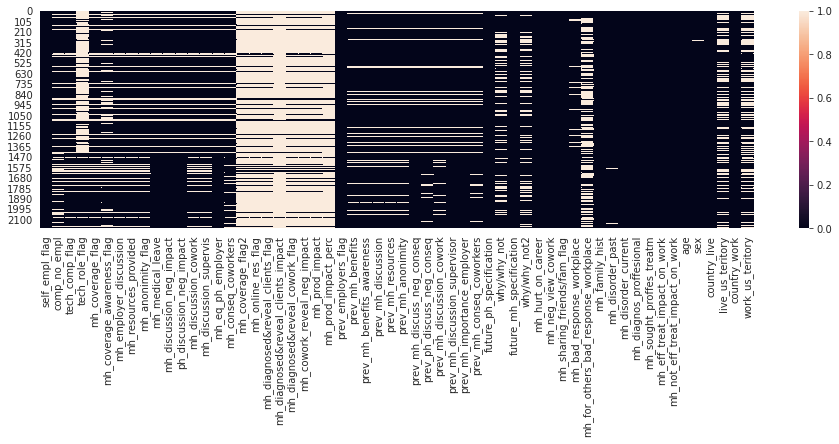

In [54]:
 print(sns)
 plt.figure(figsize = (16,4))
 sns.heatmap(data = survey_2016.isna());
#heatmap을 그려봄 으로써 어떤데이터있어 분포의 차이가 있는지 확인한 코드 

In [55]:
# The survey has 1433 rows, so first we will drop all columns where more than half of the observations have missing values
cols = (survey_2016.isna().sum() >= survey_2016.shape[0]/2).tolist()
#print(cols)
to_drop = survey_2016.columns[cols]
survey_2016.drop(labels = to_drop, axis = 1, inplace = True)
print(survey_2016)
# Dealing with other missing values
from sklearn.impute import SimpleImputer

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [57]:
import pandas as pd
print("pandas version: ", pd.__version__)

pd.set_option('display.max_rows', None)


pandas version:  1.1.5


In [76]:
#survey_2016

In [59]:

# Impute nan with the most frequent value (mode) on every row
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
# 여기서 결측치를 제거 합니다. 
print(imp)
#encoder.fit_transform(imp[:].astype(str))
imp.fit(survey_2016)
imp_data = pd.DataFrame(data = imp.transform(survey_2016), columns = survey_2016.columns)
print(imp_data)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='most_frequent', verbose=0)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [60]:
# ----------- ENCODING -----------
# Split data into 2 datasets: one that needs to be encoded, one that doesnt need to
cols = [x for x in imp_data.columns if x not in ['age', 'why/why_not', 'why/why_not2', 'country_live',
       'live_us_teritory', 'country_work', 'work_us_teritory', 'work_position']]

data_to_encode = imp_data[cols]
data_not_encode = imp_data[['why/why_not', 'why/why_not2', 'country_live',
       'live_us_teritory', 'country_work', 'work_us_teritory']]

# Importing OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

def encode(data):
    cat_columns = list(data.select_dtypes(include=['category','object']))
    column_mask = []
    
    for column_name in list(data.columns.values):
        column_mask.append(column_name in cat_columns)

    le = LabelEncoder()
    ohe = OneHotEncoder(categorical_features = column_mask)
    
    for col in cat_columns:
        data[col] = le.fit_transform(data[col])
    data = ohe.fit_transform(data)
    
    return data

encode(data_to_encode)
matrix = encode(data_to_encode)
encoded_data = pd.DataFrame(matrix) # to dataframe
print(encoded_data.shape)
print(data_not_encode.shape)
encoded_data.columns = data_to_encode.columns

# Preprocessed data
prep_data = pd.concat(objs = [encoded_data, data_not_encode], axis = 1)  
#print(prep_data) 


(2189, 41)
(2189, 6)


In [61]:
# ----------- OTHER CHANGES -----------
# There are 53 total countries
# Out of all, most respondents are in US, UK, Canada, Germany, Netherlands and Australia.
# Usually, for a sample to be representative enough for the population, the size needs to be by convention >30.
# Respondents cannot be treated equaly within a response (different background, culture etc.), so we will exclude all nations
        #with a sample size smaller than 30. Because countries with no. responses > 30 are quite similar (well developed countries
        #with big economies and similar living standards), some of the analytics will incorporate all countries as one.

# Keep only countries with no. responses > 30.
imp_data = imp_data[imp_data['country_work'].isin(['USA', 'UK', 'Canada', 
                                                   'Germany', 'Netherlands','Australia'])]
imp_data = imp_data[imp_data['country_live'].isin(['USA', 'UK', 'Canada', 
                                                   'Germany', 'Netherlands','Australia'])]

prep_data = prep_data[prep_data['country_work'].isin(['USA', 'UK', 'Canada', 
                                                   'Germany', 'Netherlands','Australia'])]
prep_data = prep_data[prep_data['country_live'].isin(['USA', 'UK', 'Canada', 
                                                   'Germany', 'Netherlands','Australia'])]

# Unfortunatelly, the tech flag that identified if the respondent works/ doesn't work in tech had a lot of missing values
# So, we will need to map the 'work_position' column (that didn't have any missing values initially)
# Create the list with tech work positions
"""
tech_list = []
tech_list.append(imp_data[imp_data['work_position'].str.contains('Back-end')]['work_position'].tolist())
tech_list.append(imp_data[imp_data['work_position'].str.contains('Front-end')]['work_position'].tolist())
tech_list.append(imp_data[imp_data['work_position'].str.contains('Dev')]['work_position'].tolist())
tech_list.append(imp_data[imp_data['work_position'].str.contains('DevOps')]['work_position'].tolist())

# Reshape the list (that is a list of lists) and remove duplicates
flat_list = [item for sublist in tech_list for item in sublist]
flat_list = list(dict.fromkeys(flat_list))

# Create a new column and recode it
imp_data['tech_flag'] = imp_data['work_position']
imp_data['tech_flag'].replace(to_replace = flat_list, value = 1, inplace = True)

# The other items - non tech
remain_list = imp_data['tech_flag'].unique()[1:].tolist()

imp_data['tech_flag'].replace(to_replace = remain_list, value = 0, inplace = True)

# The same for prep_data
# Create a new column and recode it
prep_data['tech_flag'] = prep_data['work_position']
prep_data['tech_flag'].replace(to_replace = flat_list, value = 1, inplace = True)

# The other items - non tech
prep_data['tech_flag'].replace(to_replace = remain_list, value = 0, inplace = True)
"""

"\ntech_list = []\ntech_list.append(imp_data[imp_data['work_position'].str.contains('Back-end')]['work_position'].tolist())\ntech_list.append(imp_data[imp_data['work_position'].str.contains('Front-end')]['work_position'].tolist())\ntech_list.append(imp_data[imp_data['work_position'].str.contains('Dev')]['work_position'].tolist())\ntech_list.append(imp_data[imp_data['work_position'].str.contains('DevOps')]['work_position'].tolist())\n\n# Reshape the list (that is a list of lists) and remove duplicates\nflat_list = [item for sublist in tech_list for item in sublist]\nflat_list = list(dict.fromkeys(flat_list))\n\n# Create a new column and recode it\nimp_data['tech_flag'] = imp_data['work_position']\nimp_data['tech_flag'].replace(to_replace = flat_list, value = 1, inplace = True)\n\n# The other items - non tech\nremain_list = imp_data['tech_flag'].unique()[1:].tolist()\n\nimp_data['tech_flag'].replace(to_replace = remain_list, value = 0, inplace = True)\n\n# The same for prep_data\n# Creat

In [62]:
print(prep_data.shape)

(1873, 47)


나라 중에 30개가 넘는 표본을 추출 및 기술직군애 관해 분리해서 다시 preprocessing 하는것

In [63]:
import matplotlib as mpl
sns.set_style('whitegrid')
sns.set_palette('Set2')
mpl.rcParams['font.size'] = 16
import matplotlib.gridspec as gridspec

In [64]:
#imp_data[imp_data['tech_flag'] == 1]['age'].describe()

KeyError: ignored

In [65]:
import matplotlib as mpl
sns.set_style('whitegrid')
sns.set_palette('Set2')
mpl.rcParams['font.size'] = 16
import matplotlib.gridspec as gridspec

In [66]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier, XGBRFClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn import preprocessing

In [67]:
# Excluding non numeric columns from dataset
model_data = prep_data.copy()
col_numeric = [cols for cols in model_data.columns if model_data[cols].dtype in ['int64', 'float64']]
model_data = model_data[col_numeric]

# Model data is our new dataset for predicting variable 'mh_disorder_current'

# Feature variables and target variable
y = model_data['mh_disorder_current']

cols = [col for col in model_data.columns if col not in ['mh_disorder_current']]
X = model_data[cols]

# Data Validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [68]:
# Predefined function
def model_assess(model, name='Default'):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print('---', name, '---', '\n',
          confusion_matrix(y_test, preds), '\n',
          'Accuracy:', round(accuracy_score(y_test, preds), 5), '\n')

In [69]:
# Naive Bayes
nb = GaussianNB()
model_assess(nb, name='Naive Bayes')

# Stochastic Gradient Descent
sgd = SGDClassifier(max_iter=10000, random_state=0)
model_assess(sgd, name='SGD')

# KNN
knn = KNeighborsClassifier(n_neighbors=19)
model_assess(knn, name='KNN')

# Decission trees
tree = DecisionTreeClassifier()
model_assess(tree, 'Decission Trees')

# Random Forest
rforest = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)
model_assess(rforest, 'Random Forest')

# Support Vector Machine
svm = SVC(decision_function_shape="ovo")
model_assess(svm, 'SVM')

# Logistic Regression
lg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
model_assess(lg, 'Logistic Regression')

# Neural Nets
nn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(150, 10), random_state=1)
model_assess(nn, 'Neural Nets')

# Cross Gradient Booster
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)
model_assess(xgb, 'XGBoost')

# Cross Gradient Booster (Random Forest) <=================== BEST
xgbrf = XGBRFClassifier(objective= 'multi:softmax')
model_assess(xgbrf, 'XGBoost RF')

--- Naive Bayes --- 
 [[  6   0   0   8   0]
 [  0  31  22   0  12]
 [ 17  15 105  36  18]
 [  7   0   0  35   0]
 [  2  26   4  88 130]] 
 Accuracy: 0.54626 

--- SGD --- 
 [[  3   1   7   2   1]
 [  0  31  24   0  10]
 [  2  18 150   5  16]
 [  2   3  14  13  10]
 [  0  30  47  16 157]] 
 Accuracy: 0.62989 

--- KNN --- 
 [[  0   0  10   1   3]
 [  0  10  29   1  25]
 [  0   7 145   0  39]
 [  0   0  17   1  24]
 [  0   2  11   2 235]] 
 Accuracy: 0.69573 

--- Decission Trees --- 
 [[  4   0   6   3   1]
 [  0  30  21   0  14]
 [  3  20 138   7  23]
 [  4   0  10  16  12]
 [  0  31  27  10 182]] 
 Accuracy: 0.65836 

--- Random Forest --- 
 [[  2   0   8   3   1]
 [  0  26  19   0  20]
 [  0  13 147   3  28]
 [  1   0  11  13  17]
 [  0   5   1   1 243]] 
 Accuracy: 0.7669 

--- SVM --- 
 [[  1   0   9   2   2]
 [  0  27  16   0  22]
 [  0  11 145   3  32]
 [  0   0  13   6  23]
 [  0   7   4   3 236]] 
 Accuracy: 0.73843 

--- Logistic Regression --- 
 [[  5   1   5   2   1]
 [  0 

In [ ]:
from sklearn.model_selection import GridSearchCV

# Grid Search Function
def gridSearch(parameters):
    gsearch = GridSearchCV(estimator = XGBRFClassifier(learning_rate =0.00001,n_estimators=1000,max_depth=1,min_child_weight=4,
                                                    gamma=0.3,subsample=0.8,colsample_bytree=0.8,objective= 'multi:softmax',
                                                    nthread=5,scale_pos_weight=1), 
                        param_grid = parameters, cv=5)
    gsearch.fit(X_train,y_train)
    print('best params:', gsearch.best_params_)
    predictions = gsearch.predict(X_test)
    print('Accuracy:', round(accuracy_score(y_test, predictions), 5))

In [71]:
#print(y_test)

In [72]:
param_test1 = {
 'min_child_weight':[1, 2, 3, 4]
}

gridSearch(param_test1)

best params: {'min_child_weight': 1}
Accuracy: 0.74555


In [73]:
param_test2 = {
 'gamma':[i/10.0 for i in range(0,5)]
}

gridSearch(param_test2)

best params: {'gamma': 0.0}
Accuracy: 0.74555


In [74]:
xgbrf_tuned = XGBRFClassifier(objective= 'multi:softmax', learning_rate =0.000001, n_estimators=1000, max_depth=1, 
                              min_child_weight=5,gamma = 0.3, subsample=0.8, colsample_bytree=0.9, 
                              nthread=4, scale_pos_weight=1)
model_assess(xgbrf_tuned)

--- Default --- 
 [[  0   0  12   0   2]
 [  0  25  20   0  20]
 [  0   9 154   0  28]
 [  0   3  18   0  21]
 [  0   4   4   0 242]] 
 Accuracy: 0.74911 



In [75]:
# Creating new train datasets only with features that have an importance bigger than 0.004
X_train_new = X_train[['mh_disorder_past', 'mh_not_eff_treat_impact_on_work', 'mh_diagnos_proffesional', 
                       'mh_eff_treat_impact_on_work']]
X_test_new = X_test[['mh_disorder_past', 'mh_not_eff_treat_impact_on_work', 'mh_diagnos_proffesional', 
                       'mh_eff_treat_impact_on_work']]

# Fitting the model to the new train datasets to see if we get a better accuracy
xgbrf_perm_imp = XGBRFClassifier(objective= 'multi:softmax', learning_rate =0.00001, n_estimators=1000, max_depth=1, 
                              min_child_weight=5,gamma = 0.3, subsample=0.8, colsample_bytree=0.9, 
                              nthread=4, scale_pos_weight=1)
xgbrf_perm_imp.fit(X_train_new, y_train)
predictions = xgbrf_perm_imp.predict(X_test_new)
print(confusion_matrix(y_test, predictions))
print('Accuracy:', accuracy_score(y_test, predictions))

[[  0   0  11   0   3]
 [  0  23  20   0  22]
 [  0   4 150   0  37]
 [  0   2  16   0  24]
 [  0   0   3   0 247]]
Accuracy: 0.7473309608540926
